In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
people_df = pd.read_csv("./people_data.csv")


In [6]:
people_df.head(6)

,Position,SoftSkills,Summary,Projects,BelbinRole,MBTI,MBTI_Group
0,Data Scientist,"critical thinking, problem solving, logical re...",Data scientist with a strong analytical backgr...,1. Risk Modeling Platform — created probabilis...,Monitor Evaluator,INTP,Analysts
1,Product Manager,"leadership, delegation, strategic thinking, co...",Experienced PM skilled in aligning business st...,1. Cross-platform App Launch — coordinated 4 t...,Coordinator,ENTJ,Analysts
2,Backend Engineer,"attention to detail, responsibility, structure...",Backend developer focused on system reliabilit...,1. CI/CD Automation — enabled 15% faster deplo...,Implementer,ISTJ,Sentinels
3,UX Designer,"creativity, intuition, conceptual thinking, in...",User experience designer driven by experimenta...,1. Mental Health App — reimagined interface fo...,Plant,ENFP,Diplomats
4,QA Engineer,"perfectionism, reliability, time management, p...",QA engineer who enjoys refining systems until ...,1. Regression Suite Rework — identified 23% mo...,Completer Finisher,ISTJ,Sentinels
5,Data Analyst,"Detail-oriented, Reliable, Responsible",Objective analyst assessing ideas with logic a...,['Performed business strategy reviews'],Monitor Evaluator,ESFJ,Sentinels


# General information

In [7]:
people_df.info()

print(f"Dataset shape: {people_df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Position    788 non-null    object
 1   SoftSkills  788 non-null    object
 2   Summary     788 non-null    object
 3   Projects    788 non-null    object
 4   BelbinRole  788 non-null    object
 5   MBTI        788 non-null    object
 6   MBTI_Group  788 non-null    object
dtypes: object(7)
memory usage: 43.2+ KB
Dataset shape: (788, 7)


In [8]:
print(f"Number of duplicated rows: {people_df.duplicated().sum()}")

Number of duplicated rows: 126


In [ ]:
duplicates = people_df[people_df.duplicated()]

pd.set_option('display.max_rows', None)
print(duplicates)


                  Position                              SoftSkills  \
169          Product Owner       Adaptable, Energetic, Spontaneous   
188     Business Developer     Empathetic, Cooperative, Idealistic   
233  Subject Matter Expert       Adaptable, Energetic, Spontaneous   
239       Technical Expert       Adaptable, Energetic, Spontaneous   
248           Data Analyst       Adaptable, Energetic, Spontaneous   
250  Subject Matter Expert     Empathetic, Cooperative, Idealistic   
263          Product Owner     Empathetic, Cooperative, Idealistic   
279     Business Developer      Analytical, Strategic, Independent   
282       Customer Support     Empathetic, Cooperative, Idealistic   
295           HR Assistant  Detail-oriented, Reliable, Responsible   
297     Business Developer      Analytical, Strategic, Independent   
298        Project Manager     Empathetic, Cooperative, Idealistic   
315           Scrum Master      Analytical, Strategic, Independent   
319  Subject Matter 

In [17]:
# duplicate_groups = (
#     people_df.groupby(list(people_df.columns))
#     .size()
#     .reset_index(name='count')
#     .query('count > 1')
# )

# print(duplicate_groups)


In [15]:
print(people_df.isnull().sum()) # Check for missing values

Position      0
SoftSkills    0
Summary       0
Projects      0
BelbinRole    0
MBTI          0
MBTI_Group    0
dtype: int64


In [16]:
print(people_df['BelbinRole'].value_counts())
print(people_df['MBTI_Group'].value_counts())


BelbinRole
Completer Finisher       107
Implementer              105
Monitor Evaluator         93
Specialist                91
Resource Investigator     91
Teamworker                81
Plant                     75
Shaper                    73
Coordinator               72
Name: count, dtype: int64
MBTI_Group
Analysts     204
Sentinels    204
Diplomats    195
Explorers    185
Name: count, dtype: int64


# Visualization

/var/folders/m8/c_vjz98j76g9q1j2rvlkk9240000gn/T/ipykernel_30093/509648169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=people_df, x='BelbinRole', order=people_df['BelbinRole'].value_counts().index, palette="Set2")


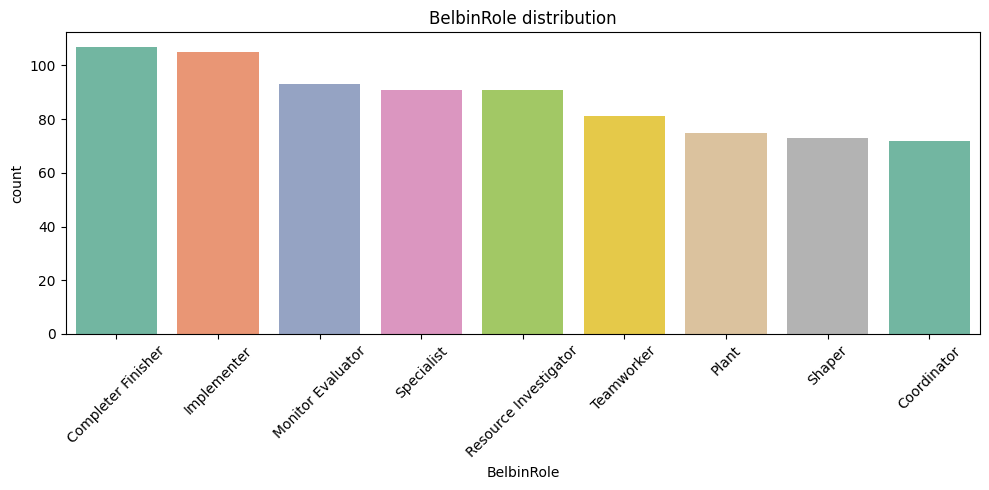

In [20]:
# 1. BelbinRole distribution
plt.figure(figsize=(10,5))
sns.countplot(data=people_df, x='BelbinRole', order=people_df['BelbinRole'].value_counts().index, palette="Set2")
plt.title("BelbinRole distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/m8/c_vjz98j76g9q1j2rvlkk9240000gn/T/ipykernel_30093/252146408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=people_df, x='MBTI_Group', order=people_df['MBTI_Group'].value_counts().index, palette="Set2")


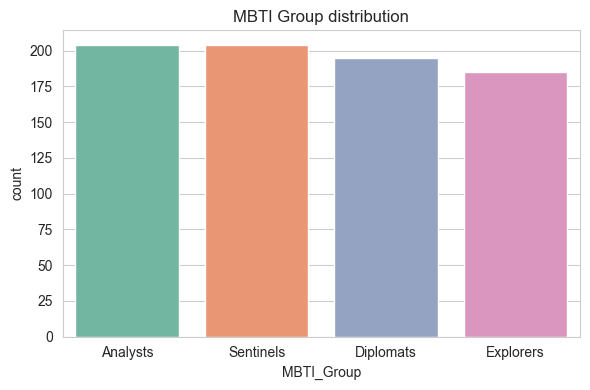

In [35]:
# 2. MBTI_Group distribution
plt.figure(figsize=(6,4))
sns.countplot(data=people_df, x='MBTI_Group', order=people_df['MBTI_Group'].value_counts().index, palette="Set2")
plt.title("MBTI Group distribution")
plt.tight_layout()
plt.show()

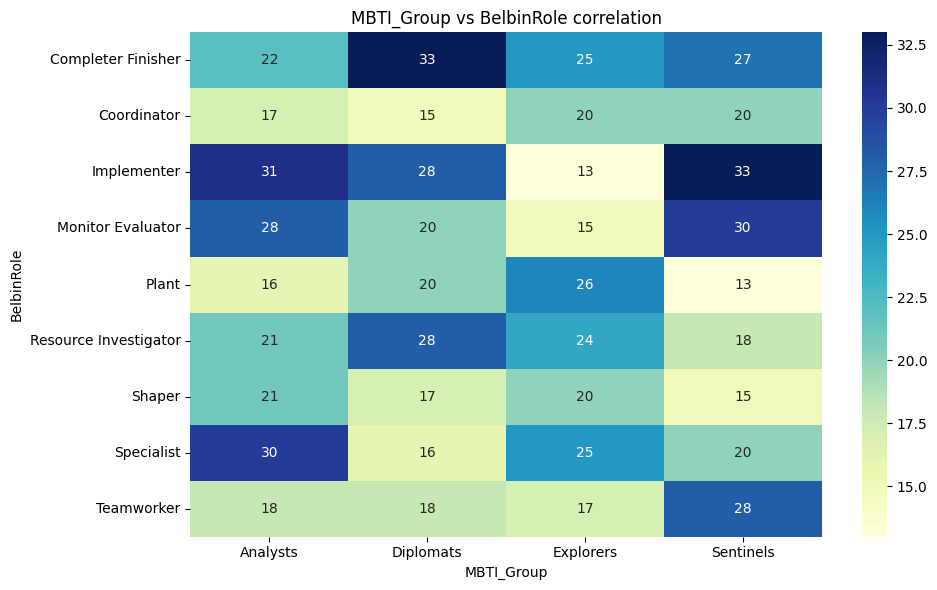

In [22]:
# 3. Heatmap of MBTI_Group vs BelbinRole correlation
plt.figure(figsize=(10,6))
cross_tab = pd.crosstab(people_df['BelbinRole'], people_df['MBTI_Group'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap="YlGnBu")
plt.title("MBTI_Group vs BelbinRole correlation")
plt.ylabel("BelbinRole")
plt.xlabel("MBTI_Group")
plt.tight_layout()
plt.show()

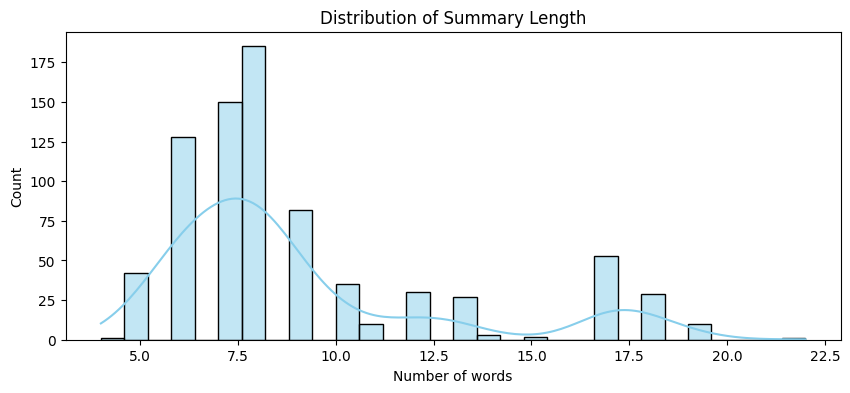

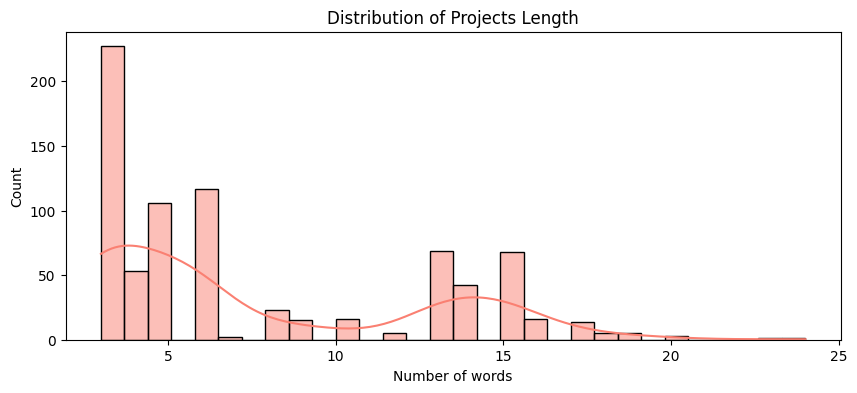

In [23]:
# 4. Length of texts in columns
people_df["summary_length"] = people_df["Summary"].apply(lambda x: len(str(x).split()))
people_df["projects_length"] = people_df["Projects"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,4))
sns.histplot(people_df["summary_length"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Summary Length")
plt.xlabel("Number of words")
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(people_df["projects_length"], bins=30, kde=True, color="salmon")
plt.title("Distribution of Projects Length")
plt.xlabel("Number of words")
plt.show()


# Analysis by Position

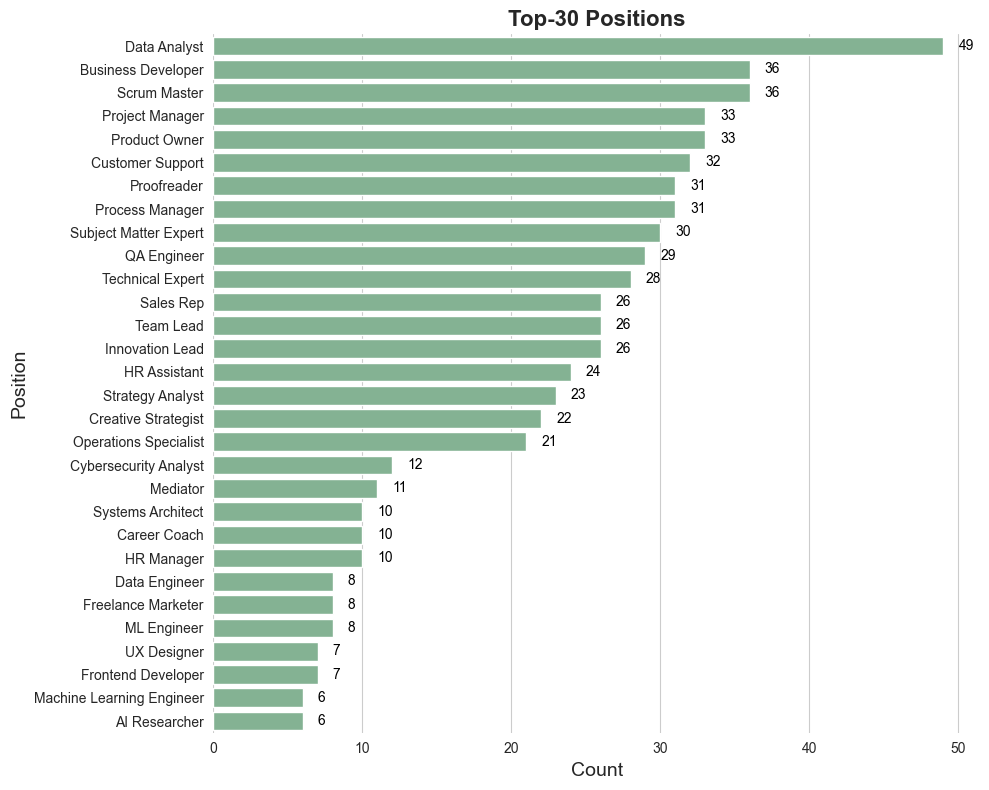

In [27]:
# 5. Top-30 Position
top_positions = people_df['Position'].value_counts().head(30)

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")  
sns.set_palette("crest")    

ax = sns.barplot(x=top_positions.values, y=top_positions.index)

plt.title("Top-30 Positions", fontsize=16, fontweight='bold')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Position", fontsize=14)

for i, v in enumerate(top_positions.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontsize=10)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


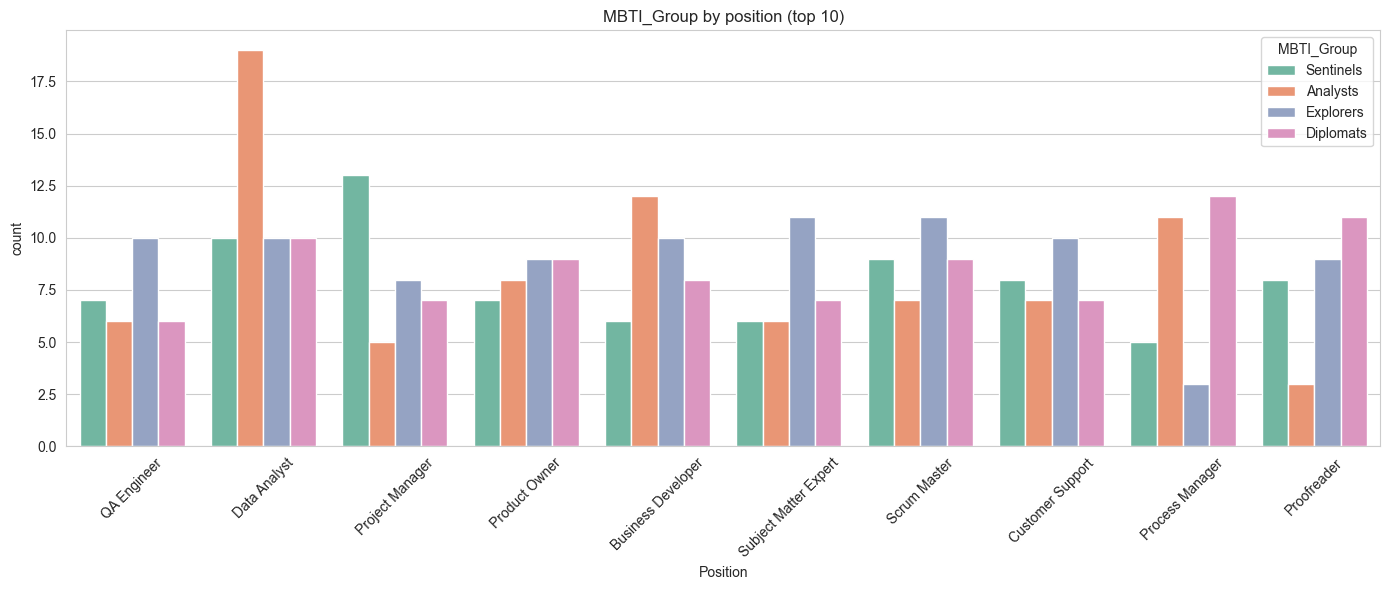

In [29]:
# 6. Distribution of MBTI_Group by position (top 10)
top_pos_names = top_positions.index[:10]
plt.figure(figsize=(14,6))
sns.countplot(data=people_df[people_df['Position'].isin(top_pos_names)],
              x='Position', hue='MBTI_Group', palette='Set2')
plt.title("MBTI_Group by position (top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


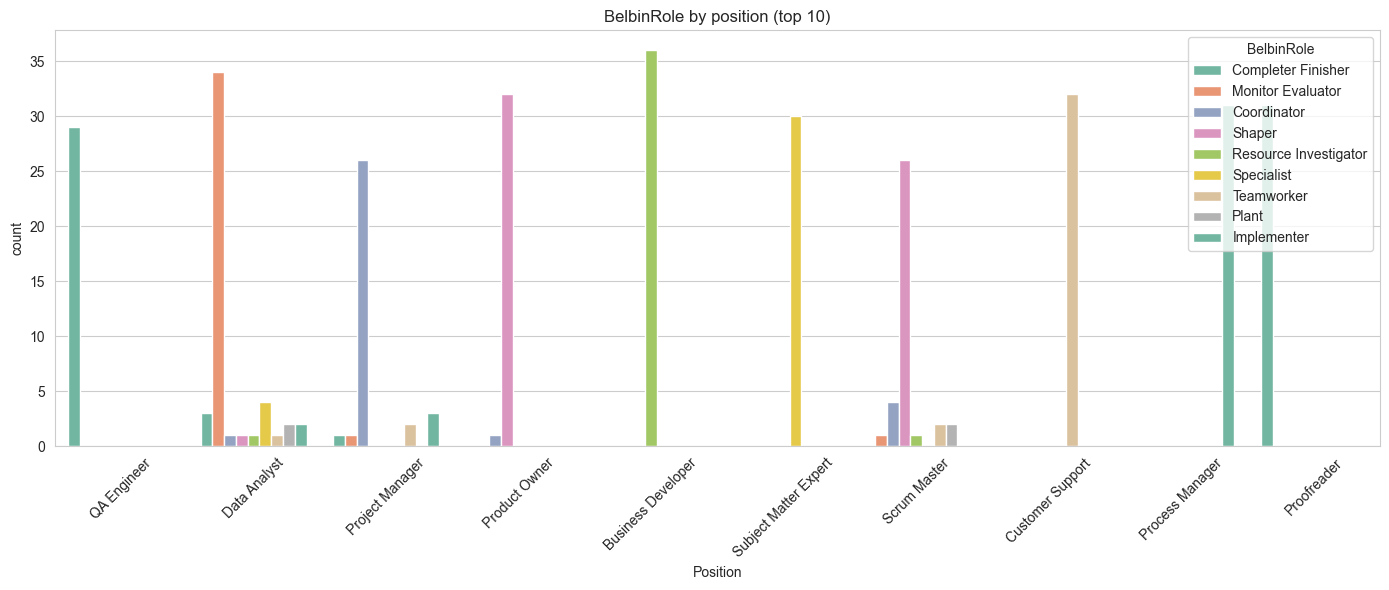

In [36]:
# 7. Distribution of BelbinRole by position (top 10)

plt.figure(figsize=(14,6))
sns.countplot(data=people_df[people_df['Position'].isin(top_pos_names)],
              x='Position', hue='BelbinRole', palette='Set2')
plt.title("BelbinRole by position (top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
# unique_positions = sorted(people_df['Position'].dropna().unique())
# print(unique_positions)

In [ ]:
unique_positions = sorted(people_df['Position'].dropna().unique())
# Print the sorted list of unique positions
for i, pos in enumerate(unique_positions, start=1):
    print(f"{pos:<30}", end="\t")
    if i % 3 == 0:
        print()


AI Engineer                   	AI Ethicist                   	AI Product Owner              	
AI Researcher                 	Assembler Developer           	Backend Developer             	
Backend Engineer              	Business Analyst              	Business Developer            	
Business Development Manager  	Business Intelligence Analyst 	Business Systems Analyst      	
C++/C Developer               	Career Coach                  	Cloud Architect               	
Cloud Engineer                	Cloud Infrastructure Engineer 	Cloud Solutions Architect     	
Community Manager             	Community Outreach Officer    	Compliance Analyst            	
Compliance Officer            	Computer Vision Engineer      	Content Strategist            	
Content Writer                	Creative Strategist           	Customer Support              	
Cybersecurity Analyst         	DSP Engineer                  	Data Analyst                  	
Data Engineer                 	Data Operations Associate    